In [ ]:
import torch

checkpoint_path = '../results/morse_models/2024-08-29-16-30-03-640-mp_morse_sgd_high_init/checkpoint_0/best_checkpoint.pt'
state_dict = torch.load(checkpoint_path, map_location='cpu')['state_dict']

: 

In [2]:
state_dict.keys()

odict_keys(['rm.0', 'rm.1', 'rm.2', 'rm.3', 'rm.4', 'rm.5', 'rm.6', 'rm.7', 'rm.8', 'rm.9', 'rm.10', 'rm.11', 'rm.12', 'rm.13', 'rm.14', 'rm.15', 'rm.16', 'rm.17', 'rm.18', 'rm.19', 'rm.20', 'rm.21', 'rm.22', 'rm.23', 'rm.24', 'rm.25', 'rm.26', 'rm.27', 'rm.28', 'rm.29', 'rm.30', 'rm.31', 'rm.32', 'rm.33', 'rm.34', 'rm.35', 'rm.36', 'rm.37', 'rm.38', 'rm.39', 'rm.40', 'rm.41', 'rm.42', 'rm.43', 'rm.44', 'rm.45', 'rm.46', 'rm.47', 'rm.48', 'rm.49', 'rm.50', 'rm.51', 'rm.52', 'rm.53', 'rm.54', 'rm.55', 'rm.56', 'rm.57', 'rm.58', 'rm.59', 'rm.60', 'rm.61', 'rm.62', 'rm.63', 'rm.64', 'rm.65', 'rm.66', 'rm.67', 'rm.68', 'rm.69', 'rm.70', 'rm.71', 'rm.72', 'rm.73', 'rm.74', 'rm.75', 'rm.76', 'rm.77', 'rm.78', 'rm.79', 'rm.80', 'rm.81', 'rm.82', 'rm.83', 'rm.84', 'rm.85', 'rm.86', 'rm.87', 'rm.88', 'rm.89', 'rm.90', 'rm.91', 'rm.92', 'rm.93', 'rm.94', 'rm.95', 'rm.96', 'rm.97', 'rm.98', 'rm.99', 'alphas.0', 'alphas.1', 'alphas.2', 'alphas.3', 'alphas.4', 'alphas.5', 'alphas.6', 'alphas.7', 'a

In [3]:
embedding = False

if embedding:
    rm = state_dict['rm.weight']
    alpha = state_dict['alphas.weight']
    D = state_dict['D.weight']
else:
    rm = torch.cat([state_dict[f'rm.{i}'] for i in range(100)], dim=0).squeeze()
    alpha = torch.cat([state_dict[f'alphas.{i}'] for i in range(100)], dim=0).squeeze()
    D = torch.cat([state_dict[f'D.{i}'] for i in range(100)], dim=0).squeeze()

In [8]:
rm

tensor([ 0.9164,  2.8148,  0.5296,  1.2466, -0.1427,  1.3024,  1.1600, -0.7637,
         1.0992,  3.0000,  1.3921,  1.3055,  0.8861,  0.7979,  0.4201,  1.8109,
         0.3697,  2.9992,  1.9353,  1.5770,  1.9206,  1.0100,  0.7382,  1.0475,
         0.7072,  0.6075,  0.7583,  0.7772,  0.8157,  1.1727,  1.1873,  1.0304,
         2.4122,  2.3222,  1.1820,  2.7163,  2.1531,  1.7774,  1.8186,  1.5552,
         1.1447,  2.6435,  2.1955,  1.5524,  1.4366,  1.5300,  1.5700,  1.7052,
         1.5639,  1.3991,  2.7082,  2.6797,  1.4469,  2.8859,  2.7333,  2.2584,
         1.9645,  2.1155,  2.0566,  2.1160,  2.8218,  2.2269,  2.6041,  2.3439,
         2.1707,  2.2853,  2.2141,  2.1551,  2.3204,  2.0609,  2.3254,  1.9134,
         1.5446,  2.6210,  2.5528,  2.0607,  1.7653,  1.6674,  1.7700,  1.9482,
         2.0733,  2.0184,  1.6097,  3.0000,  3.0000,  3.0000,  3.0000,  3.0000,
         2.9340,  2.5651,  2.8054,  2.0519,  2.5986,  2.4355,  3.0000,  3.0000,
         3.0000,  3.0000,  3.0000,  3.00

In [4]:
def morse_potential(D, alpha, rm, r):
    return D * (1 - torch.exp(-alpha * (r - rm))) ** 2 - D

In [5]:
import numpy as np

X = torch.arange(0.01, 4, 0.01)
Ys = [
    morse_potential(D[i], alpha[i], rm[i], X).cpu().numpy() for i in range(100)
]

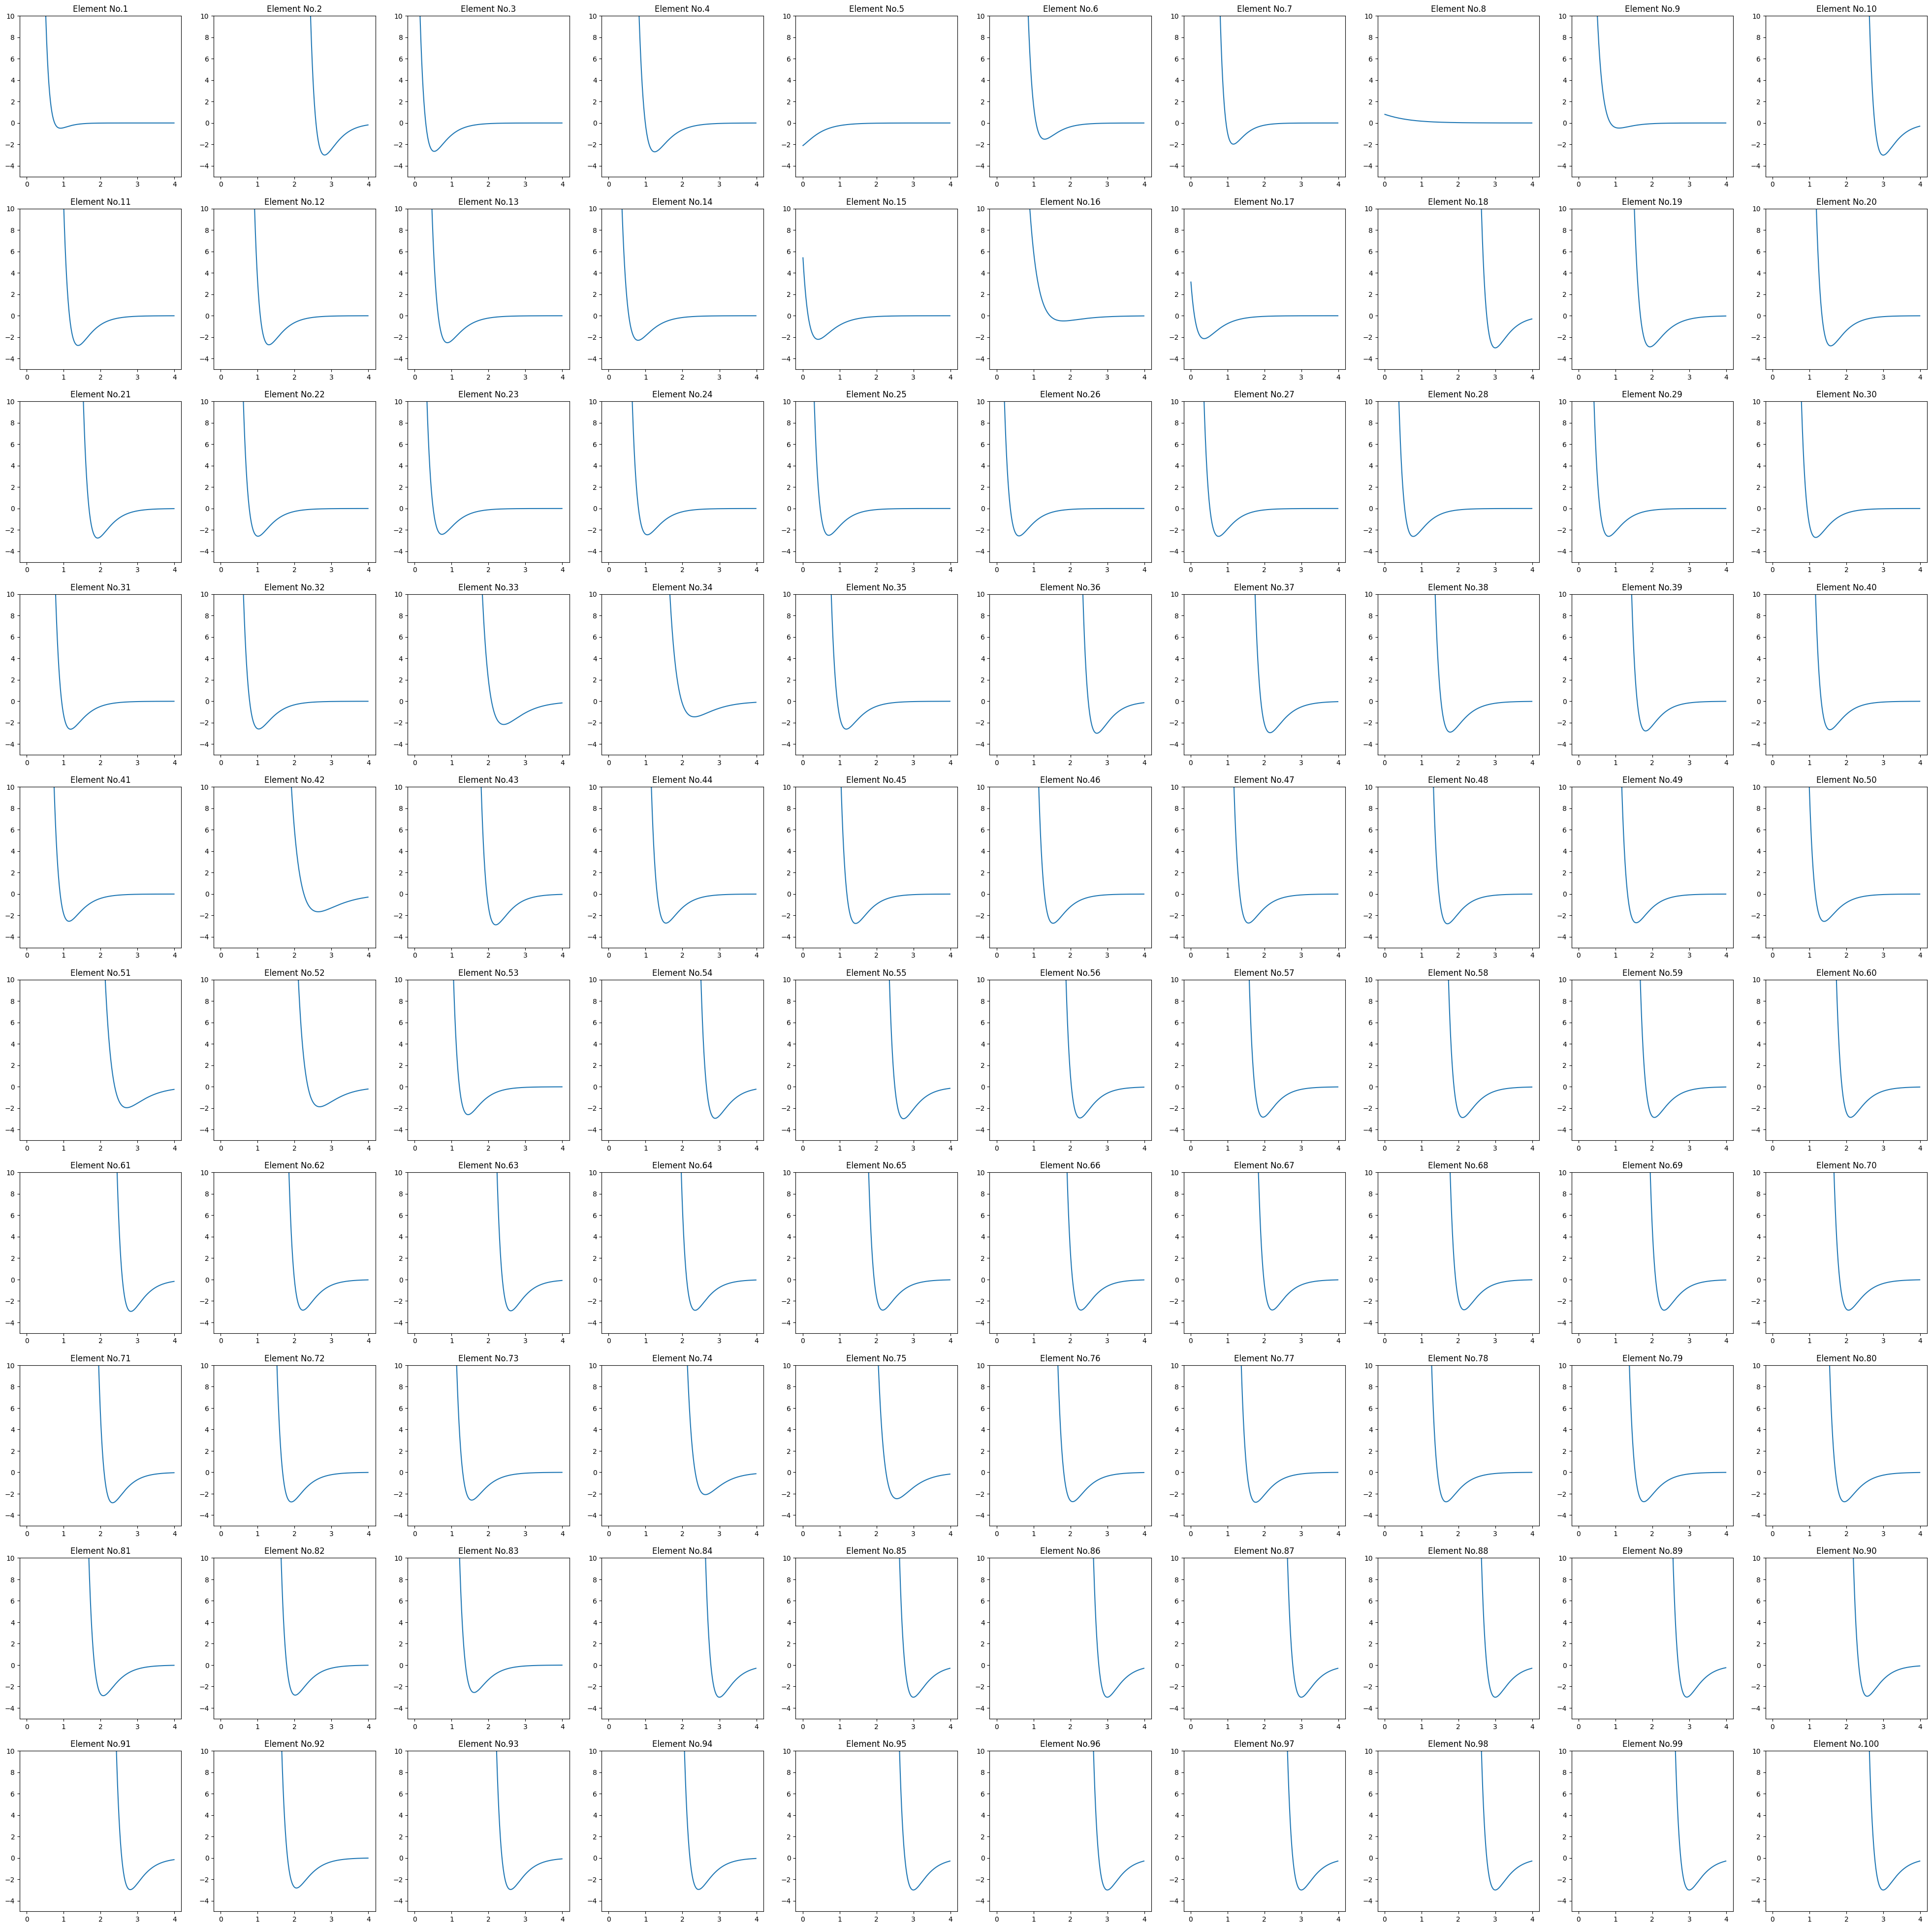

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(50, 50))

for i in range(10):
    for j in range(10):
        axes[i, j].plot(X, Ys[i * 10 + j])
        axes[i, j].set_ylim(top=10, bottom=-5)
        axes[i, j].set_title(f'Element No.{i * 10 + j + 1}')

plt.show()